<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# EDA with Walmart Sales Data

## Business Objectives

Walmart, the retail giant that operates a chain of hypermarkets, wants to understand their weekly sales data, especially the impact from holidays and big events; specifically, Super Bowl, Labor Day, Thanksgiving, and Christmas. In addition, Walmart wants to consider the effect from different macroeconomic and external factors on the weekly sales. 

## Learning Objectives

At the end of this session, you will know how to

1. Manipulate data of different types using `pandas`
2. Visualize data with `matplotlib` and `seaborn` to extract insights 
3. Perform feature engineering
4. Build a pipeline to preprocess data and fit a simple model using `sklearn` library

*Note: if you see code that's unfamiliar to you, look up for the documentation, and try to understand what it does.*

## Data Overview

- Original sales data were collected from 45 stores across the United States; however, for this session, you will first inspect data from three stores and later focus on just store 1. 

- Each store is of certain type and size, and there are multiple departments in a store. 

- The dataset has a temporal component, we mostly ignore this in this session and will discuss time series related techniques later in the cohort.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")

## Task I: Load Data 

Built on top of `numpy`, `pandas` is one of the most widely used tools in machine learning. Its rich capabilities are used for exploring, cleaning, visualizing, and transforming data.  We need to import the library to access all of its capabilities. 

In [2]:
import pandas as pd

Use `pd.read_csv` to load `train_comb.csv` that contains weekly sales, metadata, and macroeconomic features from three stores into a pandas DataFrame.

In [3]:
filepath = '../dat/train_comb.csv'
data = pd.read_csv(filepath) 

Verify that the data is loaded correctly by running `data.head(3)` to see the first few row ( AVOID printing out the entire DataFrame, i.e., `data` or `print(data)`; it might be trivial for small dataset but it can crash your kernel when the dataset is big and slow down the initial data exploration process ).

In [4]:
data.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
import seaborn as sns


<AxesSubplot: >

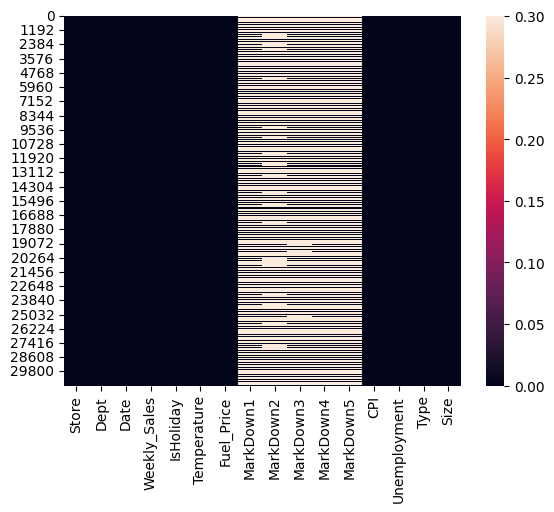

In [6]:
sns.heatmap(data.isnull(),cbar=True, vmin=0,vmax=.3) # from here we see that there is a lot of missing data 

❓ Question 1:

Look at the output of the previous cell to get an idea of each column and then write a few sentences describing what you notice about the data. 
You can also use `data.sample(3)` to draw random samples from the data (hint: look into the number of rows and columns, document any missing values, what the data types are and what the date ranges of the data collected are etc.). Date needs to be reformatted as datetime and Type needs to be clarified. Need to look into data dictionary on kaggle. 

First Observations: There is a lot of data missing from the markdown columns but no missing data in the other files. There are 30,990 rows of data.

*Acceptable responses include the number of rows and columns in the dataset, the data types of the elements, how many NaNs there are (and perhaps which columns and/or rows tend to have them), the range of values in each column or other descriptive statistics, some commentary on what this data represents, any initial concerns about how you think we should model this data, or any other commentary you would like to add.*

Use `.shape` to inspect the size of the data: sample size and number of features.

In [7]:
data.shape

(30990, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30990 entries, 0 to 30989
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         30990 non-null  int64  
 1   Dept          30990 non-null  int64  
 2   Date          30990 non-null  object 
 3   Weekly_Sales  30990 non-null  float64
 4   IsHoliday     30990 non-null  bool   
 5   Temperature   30990 non-null  float64
 6   Fuel_Price    30990 non-null  float64
 7   MarkDown1     11062 non-null  float64
 8   MarkDown2     9260 non-null   float64
 9   MarkDown3     10779 non-null  float64
 10  MarkDown4     10990 non-null  float64
 11  MarkDown5     11062 non-null  float64
 12  CPI           30990 non-null  float64
 13  Unemployment  30990 non-null  float64
 14  Type          30990 non-null  object 
 15  Size          30990 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 3.6+ MB


<details>
<summary>Expected Output</summary>
(30990, 16)
</details>

Extract the data for store 1 into a separate DataFrame. 

In [9]:
df1 = data[data["Store"] == 1]
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Let's take a random department, for example department 9, and retrieve the data.

In [10]:
data_store1_D9 = df1[df1["Dept"]==9]


Verify the result using `.head()`, `.shape`.

In [11]:
data_store1_D9.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
1144,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1145,1,9,2010-02-12,16562.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
1146,1,9,2010-02-19,15880.85,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
1147,1,9,2010-02-26,15175.52,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
1148,1,9,2010-03-05,24064.70,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [12]:
data_store1_D9.shape

(143, 16)

<details>
<summary>Expected Output</summary>
(143, 16)
</details>


Let's visualize one full year of weekly sales. 
First, sort the data by date.
Then, plot the first 52 weeks of the weekly sales over time.

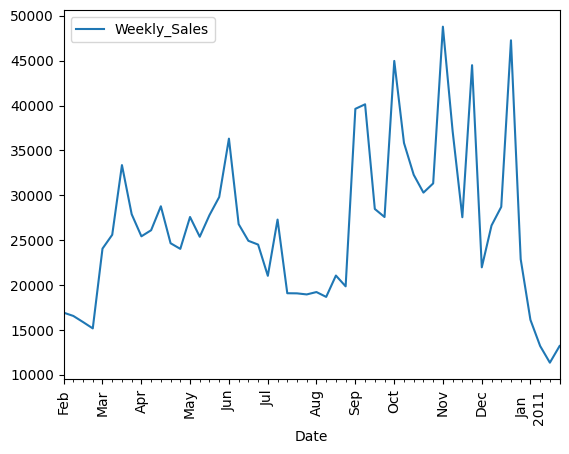

In [13]:
# Changing date to datetime to enable sort
data_store1_D9['Date'] = pd.to_datetime(data["Date"])

# Sort the data by date

data_store1_D9 = data_store1_D9.sort_values(by=["Date"])

# Then plot the weekly sales for the first 52 weeks, by setting the index to Date
data_store1_D9[['Date', 'Weekly_Sales']].iloc[:52]\
    .set_index('Date').plot(rot=90);


❓ Question 2:

Do you have any hypotheses about the holidays' impact on the sales?

Based on the data, it I hypothesize that holidays have some impact on sales but that the greatest number of sales take place between September and December suggesting that season has a greater impact.

**For the purpose of this notebook, we focus on the sales data from Store 1** that is saved in `train_store1.csv`. 

Let's read in the data.

In [14]:
df1 = pd.read_csv("../dat/train-store1.csv")

Let's work on extracting week, month, and year information from the `Date` column to be able to better manipulate the weekly data. Pandas comes with powerful capabilities to make this step easy. Reference: [tutorial
](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html). 

Before extracting the data, use `.dtypes` to check the datatype of the `Date` column. 

What's the difference between `df[['Date']]` and `df['Date']`?

In [15]:
print(df1.dtypes) 
# df[['Date']] selects a single column of data and returns it as a DataFrame 
# with a single column, while df['Date'] selects a single column of data and returns 
# it as a pandas Series object

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object


<details>
<summary>Expected Output</summary>
Date    object
dtype: object
</details>

Then, convert the Date column to a datetime object.

In [16]:
df1.Date= pd.to_datetime(df1.Date)

Verify that the `Date` column's datatype has changed as expected.

In [17]:
df1[['Date']].dtypes 

Date    datetime64[ns]
dtype: object

In [18]:
# Hint: use the dt accessor
df1['week']     = df1['Date'].dt.week
df1['month']    = df1['Date'].dt.month
df1['year']     = df1['Date'].dt.year

Verify that now there are 19 columns in your DataFrame.

In [19]:
df1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'month',
       'year'],
      dtype='object')

❓ Question 3:

Last step before we look deeper into the features is to split the data set into training and testing datasets. 

Discuss: why do we want to perform EDA only on the training data, not the entire dataset? Shouldn't it be the more data the better?

We only want to perform EDA on the training data and not the entire dataset because we don't want to make any changes to the testing set or it will be  biased. Also, more data is not better because we do not want to waste unnecessary time or create unnecessary technical debt analyzing irrelevant data.

Split the data into training dataset (80%) and test dataset (20%). Use function `train_test_split` from `scikit-learn` ( a popular library for machine learning in Python ),  and set `random_state` to be 42 for reproducibility ( this is not the best way to do train-test-split due to the temporal nature of the data, however, we will ignore it for now).

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# YOUR CODE HERE
df1_train, df1_test = train_test_split(df1, test_size=0.2)


In [22]:
print('Original set  ---> ',df1.shape,
      '\nTraining set  ---> ',df1_train.shape,
      '\nTesting set   ---> ', df1_test.shape)

Original set  --->  (10244, 19) 
Training set  --->  (8195, 19) 
Testing set   --->  (2049, 19)


<details>
<summary>Expected Output</summary>

    ```
    Original set  --->  (10244, 19) 
    Training set  --->  (8195, 19) 
    Testing set   --->  (2049, 19)
    ```
</details>

## Task II: Target, Features, and Distributions

We inspected the datatype of column `Date`. Now, let's find datatypes for all columns in `df_train`.

In [23]:
# YOUR CODE HERE
df1.dtypes 

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object

<details>
<summary>Expected Output</summary>

```
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
week                     int64
month                    int64
year                     int64
dtype: object
```
</details>

Summary statistics provide you with a general understanding of the data. Use method `.describe()`. By default it reports statistics mean, max, min, quantiles for numerical features and counts, unique, mode for categorical features.

In [24]:
pd.options.display.float_format = "{:,.2f}".format
# YOUR CODE HERE
df1.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,"10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","3,657.00","3,015.00","3,588.00","3,657.00","3,657.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00","10,244.00"
mean,1.00,44.39,"21,710.54",68.22,3.22,"8,086.73","2,967.16","1,245.40","3,755.21","5,027.75",216.00,7.61,"151,315.00",25.84,6.45,"2,010.96"
std,0.00,29.87,"27,748.95",14.20,0.43,"6,542.42","7,911.85","7,867.46","5,950.68","3,267.92",4.34,0.38,0.00,14.17,3.25,0.80
min,1.00,1.00,-863.00,35.40,2.51,410.31,0.50,0.25,8.00,554.92,210.34,6.57,"151,315.00",1.00,1.00,"2,010.00"
25%,1.00,20.00,"3,465.62",57.79,2.76,"4,039.39",40.48,6.00,577.14,"3,127.88",211.53,7.35,"151,315.00",14.00,4.00,"2,010.00"
50%,1.00,38.00,"10,289.38",69.64,3.29,"6,154.14",137.86,30.23,"1,822.55","4,325.19",215.46,7.79,"151,315.00",26.00,6.00,"2,011.00"
75%,1.00,72.00,"31,452.96",80.48,3.59,"10,121.97","1,569.00",101.64,"3,750.59","6,222.25",220.64,7.84,"151,315.00",38.00,9.00,"2,012.00"
max,1.00,99.00,"203,670.47",91.65,3.91,"34,577.06","46,011.38","55,805.51","32,403.87","20,475.32",223.44,8.11,"151,315.00",52.00,12.00,"2,012.00"


<details>
<summary>Expected Output</summary>

```
	Store	Dept	Weekly_Sales	Temperature	Fuel_Price	MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5	CPI	Unemployment	Size	week	month	year
count	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	2,931.00	2,424.00	2,878.00	2,931.00	2,931.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00	8,195.00
mean	1.00	44.65	21,865.28	68.19	3.22	8,045.43	2,961.55	1,236.83	3,683.59	5,023.69	216.00	7.61	151,315.00	25.89	6.47	2,010.96
std	0.00	29.95	27,970.00	14.16	0.43	6,484.49	8,032.30	7,830.99	5,849.69	3,303.07	4.33	0.38	0.00	14.19	3.25	0.80
min	1.00	1.00	-863.00	35.40	2.51	410.31	0.50	0.25	8.00	554.92	210.34	6.57	151,315.00	1.00	1.00	2,010.00
25%	1.00	20.00	3,502.09	57.79	2.76	4,039.39	40.48	6.00	577.14	3,127.88	211.57	7.35	151,315.00	14.00	4.00	2,010.00
50%	1.00	38.00	10,357.32	69.64	3.29	6,154.14	137.86	30.23	1,822.55	4,325.19	215.46	7.79	151,315.00	26.00	6.00	2,011.00
75%	1.00	72.00	31,647.36	80.48	3.59	10,121.97	1,569.00	101.64	3,639.42	6,222.25	220.64	7.84	151,315.00	38.00	9.00	2,012.00
max	1.00	99.00	203,670.47	91.65	3.91	34,577.06	46,011.38	55,805.51	32,403.87	20,475.32	223.44	8.11	151,315.00	52.00	12.00	2,012.0
```
</details>

❓ Question 4:

Inspect the output, what are some of your observations?

    #YOUR ANSWER HERE
    First, we see that weekly sales have a broad range over the year, with some weeks not making any money at all and others pulling in hundreds of thousands. This pulls up the mean average, so it would likely be better to use the median if we wanted a representative average of sales or an average between the 50th and 75th percentiles.

    We can also hypothesize (and try to confirm) that the Store1 is located in the north of the country since temperatures vary between 35 and 90 degrees.. suggesting northern seasonal tempertures.

    In terms of the cost of gas, we can also see that the mean is skewed due to the higher values of gas, so likely good to use the median average if analyzing fuel prices.


Are there any missing values? Use `.isna()` and `.sum()` to show the number of missing values from each column.

In [25]:
df1.isna().sum()

Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       6587
MarkDown2       7229
MarkDown3       6656
MarkDown4       6587
MarkDown5       6587
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64

In [26]:
df1.dropna(inplace=True)

<details>
<summary>Expected Output</summary>

```
Store              0
Dept               0
Date               0
Weekly_Sales       0
IsHoliday          0
Temperature        0
Fuel_Price         0
MarkDown1       5264
MarkDown2       5771
MarkDown3       5317
MarkDown4       5264
MarkDown5       5264
CPI                0
Unemployment       0
Type               0
Size               0
week               0
month              0
year               0
dtype: int64
```
</details>

What do you think the target variable is in this problem? Assign the column name to `target` for later use.

In [27]:
target = df1['Weekly_Sales'].copy()
target.head()


92   18,689.54
93   19,050.66
94   20,911.25
95   25,293.49
96   33,305.92
Name: Weekly_Sales, dtype: float64

Visualize the distribution of target variable using `distplot()` from library `seaborn` ( Why seaborn? Check out a comparison between Matplotlib and Seaborn [here](https://analyticsindiamag.com/comparing-python-data-visualization-tools-matplotlib-vs-seaborn/) ). 

What do you observe visually that the output from `.desribe` was not making obvious? What is distribution of the target variable?

<AxesSubplot: xlabel='Weekly_Sales', ylabel='Density'>

AttributeError: module 'seaborn' has no attribute 'set_xlabel'

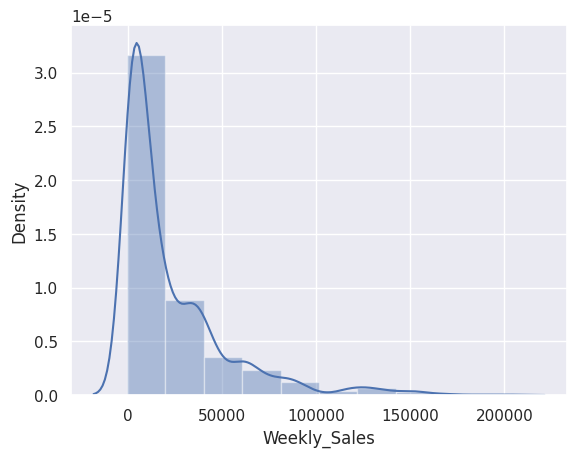

In [28]:
import seaborn as sns
# YOUR CODE HERE and set the bins to 10

import seaborn as sns

# Assuming that your dataframe is named df
sns.set(style='darkgrid')
sns.distplot(df1['Weekly_Sales'],bins=10)

# Set plot title and axes labels
#sns.set_title('Distribution of Weekly Sales')
sns.set_xlabel('Weekly Sales')
sns.set_ylabel('Density')

# Display the plot
sns.show()


Notice that there exists nonpositive weekly sales. How many rows are there that the weekly sales are negative or 0?

In [29]:
# YOUR CODE HERE 
# HINT Sum of values less than or equal to 0 in training data
negative_sales = (df1_train['Weekly_Sales'] <= 0).sum()
print(f"There are {negative_sales} rows with negative or zero weekly sales in the training data.")

# Expected Output: 13 (I got 15 from the training set...)

There are 15 rows with negative or zero weekly sales in the training data.


In [30]:
negative_sales_rows = df1_train[df1_train['Weekly_Sales'] <= 0]
print(negative_sales_rows)

      Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
2384      1    18 2012-05-04         -1.27      False        75.55   
6048      1    47 2010-02-19       -863.00      False        39.93   
6059      1    47 2011-08-12          0.00      False        90.76   
6060      1    47 2011-08-19          0.00      False        89.94   
6051      1    47 2010-10-08        -58.00      False        63.93   
6055      1    47 2011-03-11          0.00      False        53.56   
6562      1    54 2011-01-21        -50.00      False        44.04   
6578      1    54 2011-05-20        -15.00      False        67.63   
6057      1    47 2011-07-08       -198.00      False        85.83   
6062      1    47 2011-12-23       -498.00      False        47.96   
6616      1    54 2012-03-09        -21.00      False        58.76   
846       1     6 2012-08-10       -139.65      False        85.05   
6056      1    47 2011-04-08       -298.00      False        67.84   
6163      1    48 20

What percentage is the negative and zero sales?
#note, since I get 15 negative or zero sales, I get a higher percentage, which makes sense.
#18% is zero or negative sales

In [31]:
# YOUR CODE HERE
import numpy as np

# Calculate the percentage of Weekly_Sales that are negative or zero

# Create a new column in df1_train that contains a binary variable indicating whether Weekly_Sales is negative or zero
df1_train['Neg_or_Zero_Sales'] = (df1_train['Weekly_Sales'] <= 0).astype(int)

# Calculate the percentage of negative or zero sales as the mean of Neg_or_Zero_Sales
perc_neg_or_zero_sales = df1_train['Neg_or_Zero_Sales'].mean() * 100

print(f"{perc_neg_or_zero_sales:.2f}% of Weekly Sales values in the training set are negative or zero.")


# HINT if you think about target variable as a binary variable,
# with either negative and zero sales or positive sales,
# then the percentage of negative and zero sales is the percentage of 0s in the target variable
# which is the same as taking the average of the negative and zero sales

0.18% of Weekly Sales values in the training set are negative or zero.


<details>
<summary>Expected Output</summary>

`0.0015863331299572911` or `0.16%`
</details>

After communicating your findings, the stakeholders confirm that you can remove these data entries for now and they are launching an investigation with data analysts and data engineers. 

Now remove the negative and zero sales from the training dataset.

In [32]:
df1_train = df1_train[df1_train['Weekly_Sales'] > 0]
df1_train.shape # Expected Output: (8182, 19)
#this is consistent with my getting 2 more rows with negative or zero values

(8180, 20)

Let's move on to feature engineering. 

Although almost all the features are numerical, should they all be treated as numerical features? Let's inspect the number of unique values. 

What does this tell you?

In [33]:
#[(col, df1[col].nunique())for col in df1_train.columns]
[(col, df1_train[col].nunique()) for col in df1_train.columns if col != 'Neg_or_Zero_Sales']
# The following unique values for each feature tells me that only two holidays have been 
# captured over the course of a year, that there are 77 different departments in one store
# over a 3 year period and that data was not recorded for all 156 weeks within that 3 year 
# period.


[('Store', 1),
 ('Dept', 77),
 ('Date', 143),
 ('Weekly_Sales', 8048),
 ('IsHoliday', 2),
 ('Temperature', 143),
 ('Fuel_Price', 137),
 ('MarkDown1', 51),
 ('MarkDown2', 41),
 ('MarkDown3', 49),
 ('MarkDown4', 51),
 ('MarkDown5', 51),
 ('CPI', 143),
 ('Unemployment', 12),
 ('Type', 1),
 ('Size', 1),
 ('week', 52),
 ('month', 12),
 ('year', 3)]

`Temperature`, `CPI`, `Unemployment`, `Fuel_Price` are continuous variables. Those tie to the second business objective of looking into the effects from different external factors on weekly sales. 

Put these four features into a list and store it in `external_factors`. 

Earlier we noticed that `MarkDownx` columns contain some missing values, so we will focus on them in a later task. 

In [34]:
external_factors = ['Temperature','CPI','Unemployment', 'Fuel_Price']
df1_temp = df1_train['Temperature']
df1_temp.head()

5978   85.83
2730   49.27
58     62.76
9699   49.27
5690   42.31
Name: Temperature, dtype: float64

Plot `Temperature` using a box plot.

Hint: Set the figure size as (6, 4), and turn off the grid.

❓ Question 5:

Visualize `Temperature` in a box plot, what do you think the advantage of a box plot over histogram? 

`YOUR ANSWER HERE`

<Figure size 600x400 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6dcc509870>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6dcc680340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6dcc50bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6dcc680ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6dcc680f40>],
 'means': []}

Text(0.5, 0, 'Temperature')

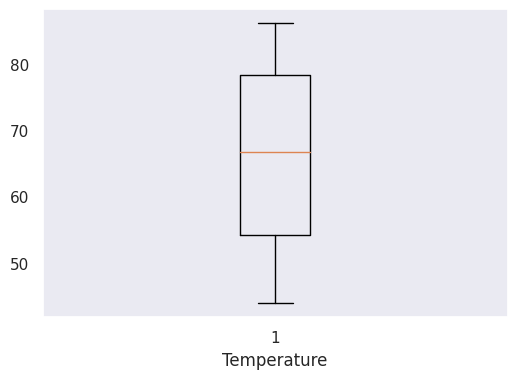

In [35]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6,4))

# Create box plot
plt.boxplot(df1['Temperature'])
plt.grid(False)

# Set x-axis label
plt.xlabel('Temperature')

# Show the plot
plt.show()


Plot all four numerical features using both distribution plot and box plot. Note any observations.

                                 Numeric Features Distribution                                  


<Figure size 1200x400 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: xlabel='Temperature', ylabel='Density'>

<AxesSubplot: >

<AxesSubplot: xlabel='CPI', ylabel='Density'>

<AxesSubplot: >

<AxesSubplot: xlabel='Unemployment', ylabel='Density'>

<AxesSubplot: >

<AxesSubplot: xlabel='Fuel_Price', ylabel='Density'>

<Figure size 1200x400 with 0 Axes>

<AxesSubplot: >

Text(0.5, 0, 'Value')

Text(0.5, 1.0, 'Box Plot of Numeric Features')

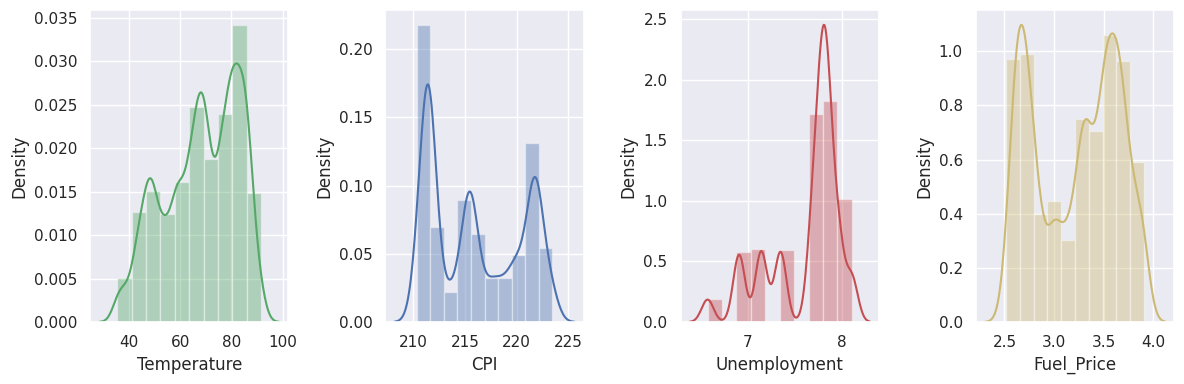

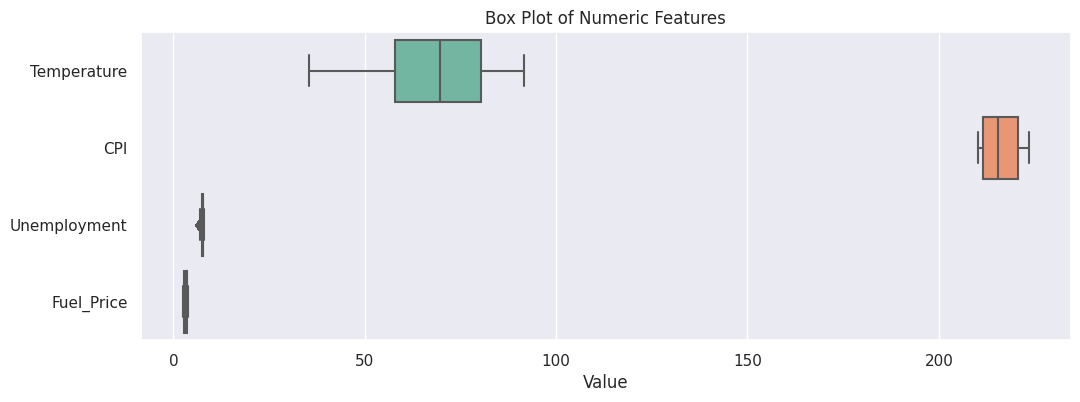

In [36]:
import matplotlib.pyplot as plt
print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 4)

n=len(external_factors)
colors = ['g', 'b', 'r', 'y', 'k']

# histogram
plt.figure(figsize=figsize)
for i in range(len(external_factors)):
    plt.subplot(1,n,i+1)
    sns.distplot(df1_train[external_factors[i]],
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

# boxplot
# YOUR CODE HERE
plt.figure(figsize=figsize)
sns.boxplot(data=df1_train[external_factors], orient="h", palette="Set2")
plt.xlabel('Value')
plt.title('Box Plot of Numeric Features')
plt.show()

Noting Features: There might be a relationship between high fuel prices and high CPI values. 

We will investigate the impacts of the external factors later. Now let's scan through the other features.

`Store`, `Type`, and `Size` each have only one unique value, offering no information, so we can safely ignore them. 

We extracted `year`, `month`, and `week` from  `Date`, thus `Date` is redundant; but it is easy to find the date range in the training dataset using `Date`:

In [37]:
df1_train['Date'].min(), df1_train['Date'].max() 
# Expected Output: (Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Our training data ranges from 5th of February 2010 to 26th of October 2012.

It makes more sense to treat `year`, `month`, `week` as categorical variables, and even more accurately ordinal variables. 

The boolean feature `IsHoliday` can be considered categorical, and so can `Dept`. 

Let's put these column names into a list `categoricalFeatures`.

In [38]:
categoricalFeatures = ['year','month','week','IsHoliday', 'Dept']

For the categorical features, we are interested in the frequency of each value. 
Use `pandas` method `value_counts` to find the number of rows where `IsHoliday` is true and false respectively.

In [39]:
# YOUR CODE HERE

# Find frequency of each value in the categorical features
for feature in categoricalFeatures:
    print(f"Frequency of {feature}:")
    print(df1_train[feature].value_counts())

# Find the number of rows where IsHoliday is true and false respectively
print('Number of rows where IsHoliday is true:', df1_train[df1_train['IsHoliday'] == True].shape[0])
print('Number of rows where IsHoliday is false:', df1_train[df1_train['IsHoliday'] == False].shape[0])


Frequency of year:
2011    2972
2010    2743
2012    2465
Name: year, dtype: int64
Frequency of month:
4     791
7     785
10    766
9     749
3     743
6     739
8     727
2     710
5     700
12    564
1     453
11    453
Name: month, dtype: int64
Frequency of week:
20    186
5     183
39    181
19    180
9     179
40    178
15    178
7     178
43    177
8     177
42    176
22    176
25    176
34    176
36    175
37    174
11    174
41    173
17    172
30    172
31    172
10    172
6     172
35    172
21    169
23    169
28    168
27    168
24    166
14    165
12    165
32    165
29    165
13    165
18    165
16    164
26    164
38    163
33    160
1     118
49    118
50    116
2     115
45    114
46    114
48    113
47    113
44    112
4     112
51    110
3     108
52    107
Name: week, dtype: int64
Frequency of IsHoliday:
False    7613
True      567
Name: IsHoliday, dtype: int64
Frequency of Dept:
72    126
21    125
90    124
87    121
30    121
     ... 
99     32
51     27
47    

<details>
<summary>Expected Output</summary>

```
False    7586
True      596
Name: IsHoliday, dtype: int64
```
</details>

Visualize the distribution of `month`; use `sns.countplot()`

<Figure size 800x600 with 0 Axes>

<AxesSubplot: xlabel='month', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

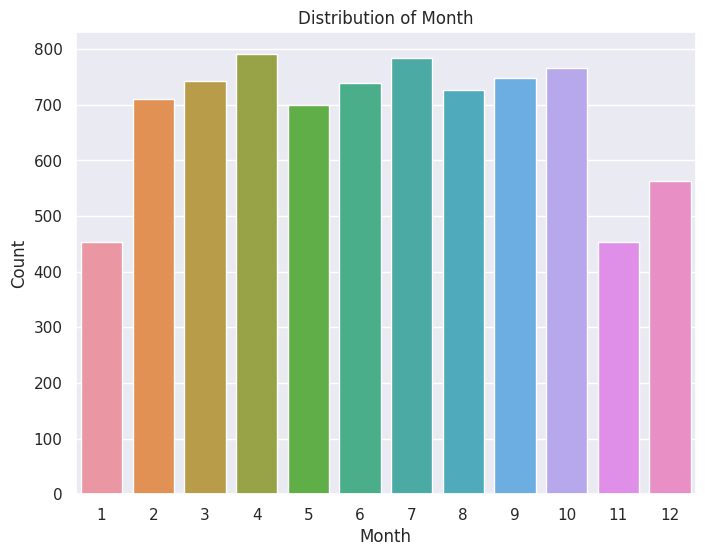

In [40]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
sns.countplot(data=df1_train, x='month')
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Next, let's look into some plots of categorical features. 

                               Visualising Categorical Features:                                


<Figure size 1200x1200 with 0 Axes>

<AxesSubplot: >

KeyError: 0

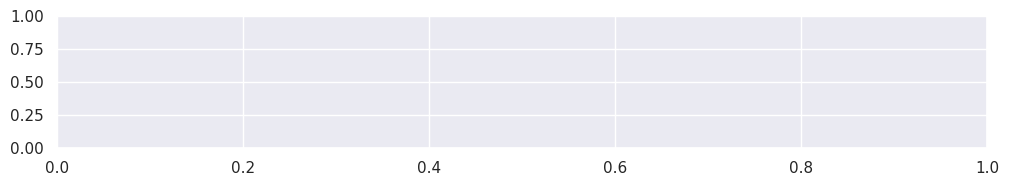

In [41]:
print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))
for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot(df1_train[categoricalFeatures[i]])
    plt.xlabel(categoricalFeatures[i])
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

                               Visualising Categorical Features:                                


<Figure size 1200x1200 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: xlabel='year', ylabel='count'>

Text(0.5, 0, 'year')

Text(0, 0.5, 'Count')

<AxesSubplot: >

<AxesSubplot: xlabel='month', ylabel='count'>

Text(0.5, 0, 'month')

Text(0, 0.5, 'Count')

<AxesSubplot: >

<AxesSubplot: xlabel='week', ylabel='count'>

Text(0.5, 0, 'week')

Text(0, 0.5, 'Count')

<AxesSubplot: >

<AxesSubplot: xlabel='IsHoliday', ylabel='count'>

Text(0.5, 0, 'IsHoliday')

Text(0, 0.5, 'Count')

<AxesSubplot: >

<AxesSubplot: xlabel='Dept', ylabel='count'>

Text(0.5, 0, 'Dept')

Text(0, 0.5, 'Count')

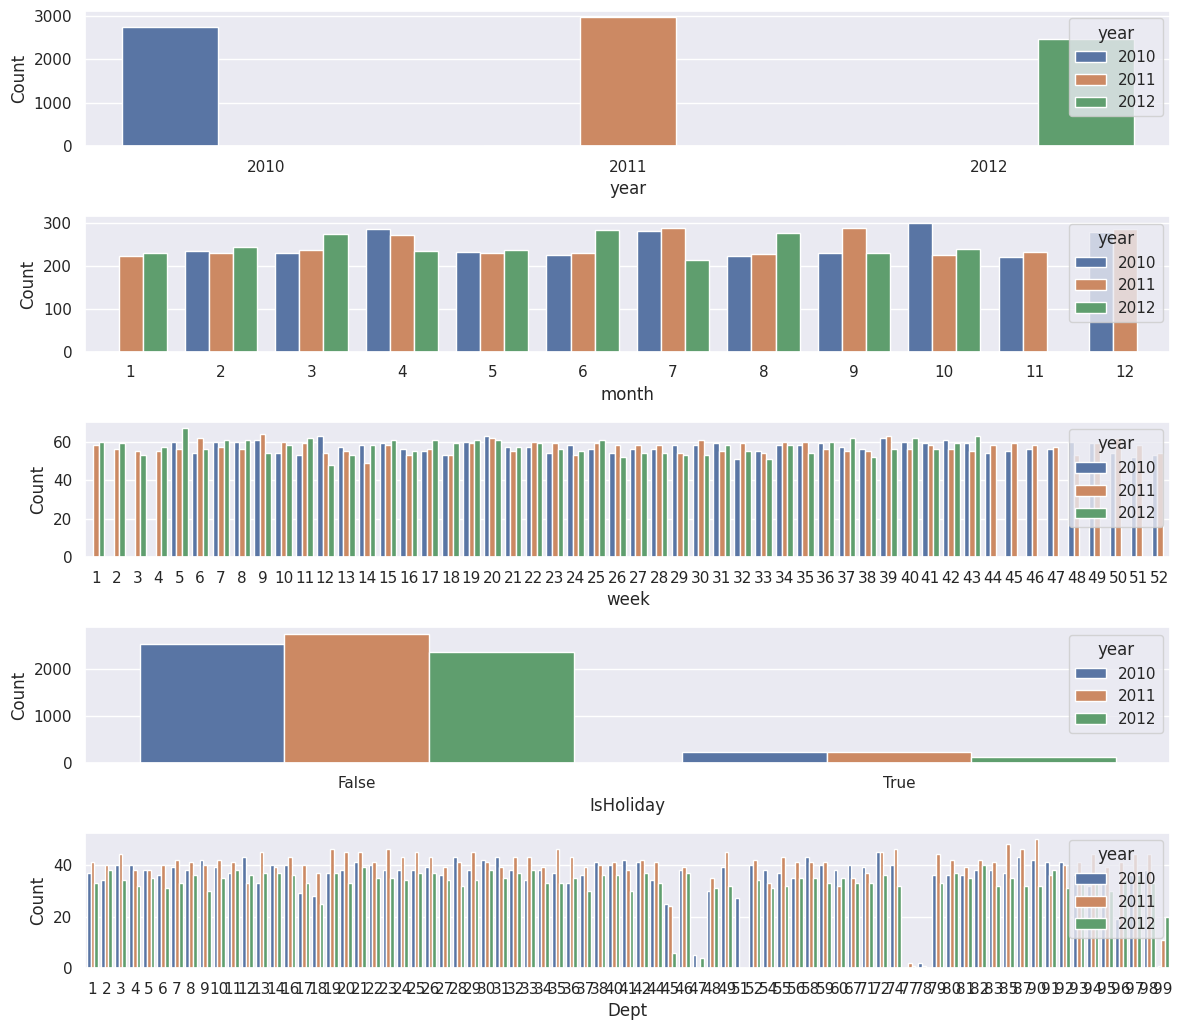

In [42]:
# I can't really get anything out of above so adjusting it with color to see 
# see each of the years and months
print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))
for i in range(len(categoricalFeatures)):
    plt.subplot(6,1,i+1)
    sns.countplot(data=df1_train, x=categoricalFeatures[i], hue='year')
    plt.xlabel(categoricalFeatures[i])
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

❓ Question 6: 

Discuss with your pair programming partner: 

There is less data in 2012 than the previous two years. Did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?

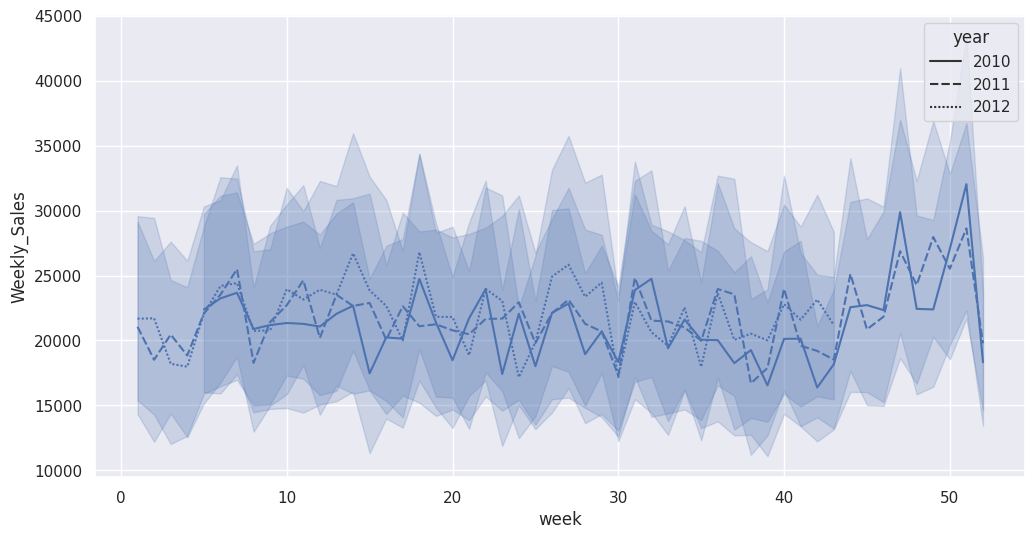

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1_train, x="week", y="Weekly_Sales",  style='year');

`YOUR ANSWER HERE`
There is less data in 2012 than the previous two years. Did the sale drop from previous years? Does it affect what we see in the plots for month and week? Does the plot below clarify it to some degree?  
There is less data in 2012 because weeks 45 and up are missing or completely dropped (as illustrated by lack of dotted line). This might indicate a store closure given that it's the holiday season but we'll see from the next section!

## Task III: Impact from Holidays

The first business objective is to understand the impact of holidays on weekly sales. 

There is a feature `IsHoliday` that we can use to calculate the average weekly sales for holiday weeks and non-holiday weeks. 

For this purpose, we can use `.groupBy` and `.mean()`. Are holiday sales higher?

In [44]:
# YOUR CODE HERE
# Group the DataFrame by IsHoliday column and calculate the mean of Weekly_Sales
average_holiday_sales = df1_train.groupby('IsHoliday')['Weekly_Sales'].mean()

# Print the results
print("Average weekly sales by holiday status:")
print(average_holiday_sales)


Average weekly sales by holiday status:
IsHoliday
False   21,600.07
True    23,377.31
Name: Weekly_Sales, dtype: float64


<details>
<summary>Expected Output</summary>

```
IsHoliday
False   21,756.05
True    23,737.05
Name: Weekly_Sales, dtype: float64
```
</details>


But we would like to understand it at more granular level. Remember [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson's_paradox)? To save some time,  date mapping are identified for the training data

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
- Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
- Thanksgiving: 26-Nov-10, 25-Nov-11
- Christmas: 31-Dec-10, 30-Dec-11

We provided the code to create a flag for each holiday to help you analyze weekly sale by each holiday type.

In [45]:
superbowl_mask = df1_train['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10'])
laborday_mask = df1_train['Date'].isin(['2010-09-10', '2011-09-09','2012-09-07'])
thanksgiving_mask = df1_train['Date'].isin(['2010-11-26', '2011-11-25'])
christmas_mask = df1_train['Date'].isin(['2010-12-31', '2011-12-30'])

In [46]:
df1_train['superbowl'] = superbowl_mask
df1_train['laborday'] = laborday_mask
df1_train['thanksgiving'] =thanksgiving_mask
df1_train['christmas'] = christmas_mask

Run the next cell to see:

1. how many weekly sales happened on Christmas (does it make sense? what did we not account for?)
2. what is the average weekly sales stratified by whether it is Christmas week or not?

In [47]:
df1_train.groupby(['christmas'])\
        .agg(count = ('christmas', 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))

,count,avg_weekly_sales
christmas,,
False,8073,"21,758.52"
True,107,"19,063.12"


Perform the same analysis for the other three holidays:

In [48]:
holidays = ['superbowl', 'laborday', 'thanksgiving', 'christmas']
for holiday in holidays:
    summary_stats = df1_train.groupby([holiday])\
        .agg(count = (holiday, 'size'), 
             avg_weekly_sales= ('Weekly_Sales','mean'))
    print("Summary statistics for holiday:", holiday)
    print(summary_stats)
    print()
    
 

Summary statistics for holiday: superbowl
           count  avg_weekly_sales
superbowl                         
False       8008         21,681.82
True         172         23,652.74

Summary statistics for holiday: laborday
          count  avg_weekly_sales
laborday                         
False      8005         21,705.70
True        175         22,526.52

Summary statistics for holiday: thanksgiving
              count  avg_weekly_sales
thanksgiving                         
False          8067         21,630.28
True            113         28,360.79

Summary statistics for holiday: christmas
           count  avg_weekly_sales
christmas                         
False       8073         21,758.52
True         107         19,063.12



<details>
<summary>Expected Output</summary>

```
           count  avg_weekly_sales
superbowl                         
False       8001         21,845.80
True         181         24,311.98

          count  avg_weekly_sales
laborday                         
False      8007         21,884.35
True        175         22,632.78

              count  avg_weekly_sales
thanksgiving                         
False          8067         21,813.97
True            115         27,959.84

           count  avg_weekly_sales
christmas                         
False       8057         21,921.06
True         125         20,565.56
```
</details>


Without hypothesis testing and only by eyeballing, it seems like Super Bowl and Thanksgiving have a positive impact on the weekly sales for store 1 in the training dataset. 

Discuss with your teammate, are you surprised that during Christmas, sales at Walmart did not go up? Holiday effect, if causal, happened most during Thanksgiving weeks. Is this something you expected?

We have been ignoring `Dept`, let's take a look at the plot below showing the weekly sales by department in 2011. 

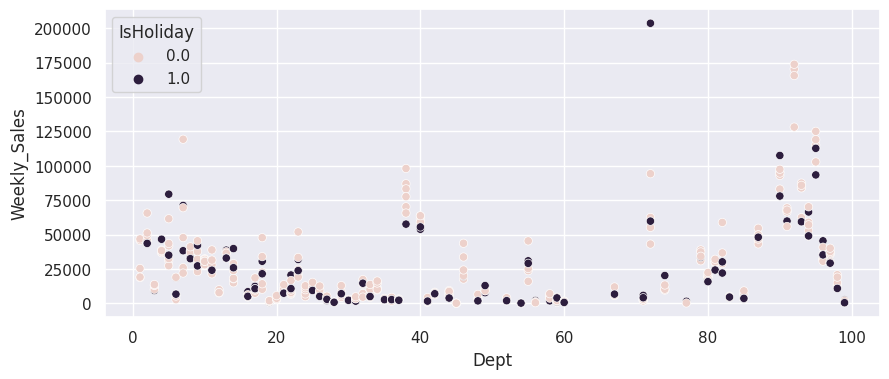

In [49]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df1_train[df1_train.year==2011], x = 'Dept', y= target, hue='IsHoliday');

Dept 72 has a very unusual high weekly sales during the holiday week, but we will need more data to understand if this is data issue, outlier, or special event. 

## Task IV: Visualize Relationship between Macroeconomic & External Factors and Sales

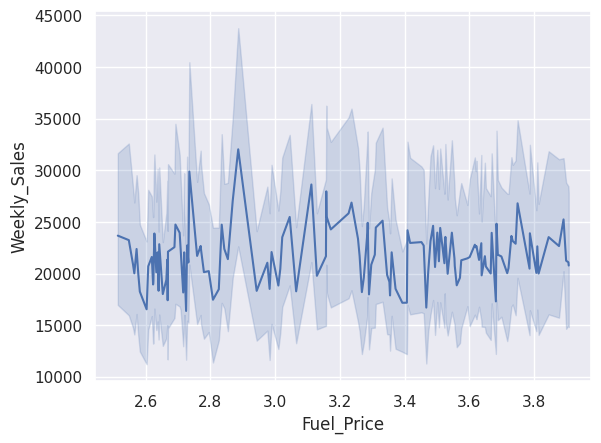

In [50]:
sns.lineplot(data=df1_train, x="Fuel_Price", y="Weekly_Sales");

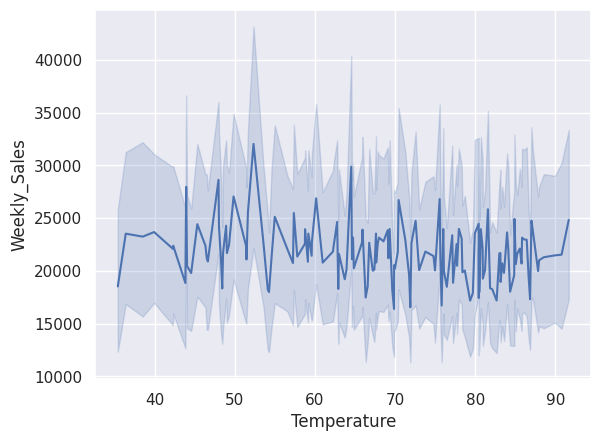

In [51]:
sns.lineplot(data=df1_train, x="Temperature", y="Weekly_Sales");

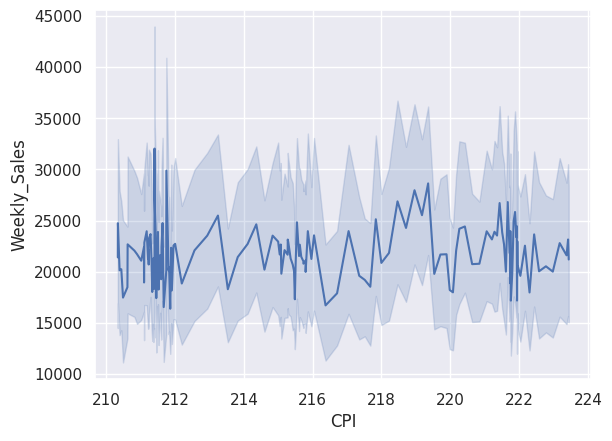

In [52]:
sns.lineplot(data=df1_train, x="CPI", y="Weekly_Sales");

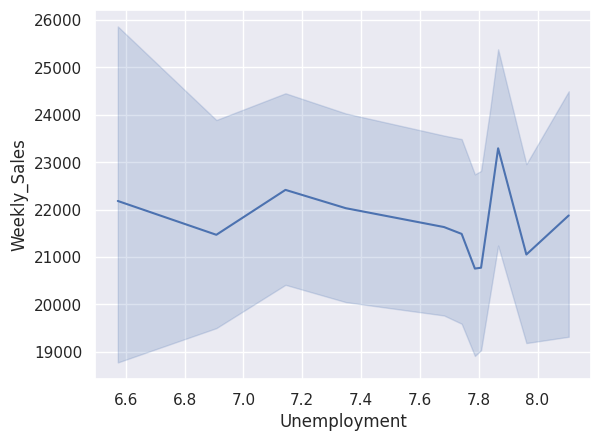

In [53]:
sns.lineplot(data=df1_train, x="Unemployment", y="Weekly_Sales");

By eyeballing, do you find strong evidence that these external and macroeconomic factors are correlated with Walmart's weekly sales? Do you think `lineplot` is an appropriate plot to visualize this relationship?

Lastly, we calculate the spearman correlations between the target and the external factors to verify that there is no strong linear correlation between the target variable and these features.

In [54]:
# mask = df1_train[target] ***********try to figure this out...

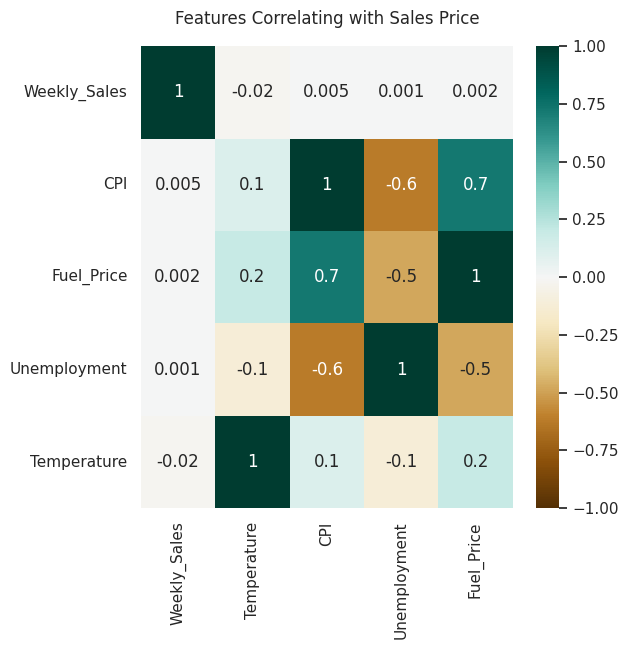

In [55]:
plt.figure(figsize=(6, 6))
df1_train_reduced = df1_train[['Weekly_Sales'] + external_factors]
corr = df1_train_reduced.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by='Weekly_Sales', ascending=False),
                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

## Task V: Feature Engineering

"*Feature Engineering encapsulates various data engineering techniques such as selecting relevant features, handling missing data, encoding the data, and normalizing it. It is one of the most crucial tasks and plays a major role in determining the outcome of a model.*" [Ref](https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/).

One part of feature engineering is to create new features from the given data, like the `thanksgiving` column that was earlier derived from `Date`. 

Common techniques for tabular data include adding summary statistics of the numerical features such as mean and standard deviation, and creating new features from the interaction of multiple features, etc. 

In this task, we will work on handling missing data, normalizing numerical features, and encoding categorical features. 

First, let's focus on missing data. Missing value treatment is crucial, yet not trivial. Take a read on [Tackling Missing Value in Dataset](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) for detailed explanation. Features with nulls or wrong values (e.g., negative fuel price) needs to be imputed or removed. 

- Do you want to keep the features with missing value? Discuss the trade offs with your teammate.
- If the answer to the first question is yes, then how do you want to impute them? Discuss the trade offs with your teammate.

From the earlier steps, we observed that only the markdown columns contain missing values, however we do not have more information on what those columns represent exactly.  

In [56]:
df1_train.columns[df1_train.isna().sum() != 0]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

For each column, find out the percentage of the data is missing.

In [57]:
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in ['MarkDown'+str(i) for i in range(1,6)]:
    perc_missing =  df1_train[col].isnull().sum() / len(df1_train); perc_missing:float
    print (f'{col}: {perc_missing:.0%} is missing')

MarkDown1: 64% is missing
MarkDown2: 71% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing


<details>
<summary>Expected Output</summary>

```
MarkDown1: 64% is missing
MarkDown2: 70% is missing
MarkDown3: 65% is missing
MarkDown4: 64% is missing
MarkDown5: 64% is missing
```
</details>


The majority of the markdown fields are missing. This is where, again, we need to communicate with the stakeholders to understand what the data measure, how the data was collected and then determine our strategy from there. Since we want to understand the impacts of `MarkDownx` on weekly sales, we will keep the features and impute the missing values.  We have learned that there are tradeoffs with how we treat missing values and that our choice of imputation can be significantly impacted by extreme values and the amount of the missing data.  We choose to impute with the median here to mitigate these negative impacts. Use `.fillna()` to impute the missing values.

In [58]:
# YOUR CODE HERE
md_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in md_cols:
    col_median = df1_train[col].median()
    df1_train[col].fillna(col_median, inplace=True)


In [59]:
(df1_train.isna().sum() != 0).sum() # sanity check: 0

0

Visualize the distributions for those markdown fields after imputations, are they normal?

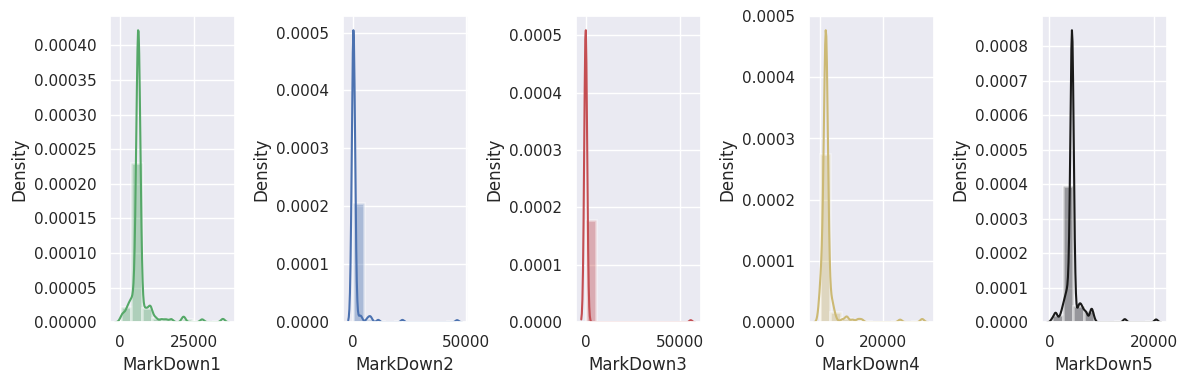

In [60]:
plt.figure(figsize=figsize)
for i in range(len(md_cols)):
    plt.subplot(1,len(md_cols),i+1)
    sns.distplot(df1_train[md_cols[i]],
                 hist_kws=dict(linewidth=2),
                 bins=10, 
                 color = colors[i])
plt.tight_layout();

Note that missing values are different from outliers. Outliers, on the other hand, are feature values that are rare in nature. They can unncessarily skew the data and cause problem for modeling. Outlier treatment involves removing or imputing such values. One popular approach to identify outliers is IQR; that is, data points that lie 1.5 times of IQR above Q3 (third quartile) and below Q1 (first quartile) are outliers. Take a read on [Detecting and Treating Outliers](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/). 

We will leave it as an optional exercise for you to identify outliers using IQR, and replace the outliers with the median.

Now let's see how we can normalize the data. For numerical features it means scaling the features to be of similar range. This step is crucial for machine learning algorithms that calculate distances between data (e.g., read [The Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

For this task, let's keep `Temperature` from the external features, since it is the most linearly correlated with the target variable, though very weak and negative. 

In addition, we include one markdown field. Since neither seems to follow normal distributions, it is safer to use `MinMaxScaler` from `sklearn.preprocessing` to transform features by scaling each feature to a given range (See discussion on [Normalization vs Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/))

In [61]:
from sklearn.preprocessing import MinMaxScaler

numericalFeatures = ['Temperature', 'MarkDown1']
df1_train_num = df1_train[numericalFeatures]

In [62]:
df1_train_num.describe() # Check the summary statistics

,Temperature,MarkDown1
count,"8,180.00","8,180.00"
mean,68.23,"6,881.67"
std,14.20,"4,131.14"
min,35.40,410.31
25%,57.79,"6,154.14"
50%,69.64,"6,154.14"
75%,80.48,"6,154.14"
max,91.65,"34,577.06"


Instantiate a MinMaxScaler and fit using `df_train_num`:

In [63]:
from sklearn.preprocessing import MinMaxScaler

# instantiate MinMaxScaler object
scaler = MinMaxScaler()

# fit scaler using numerical columns from df1_train_num
scaler.fit(df1_train_num)



MinMaxScaler()

Now transform training data `df_train_num` and store the resulting nparray in `train_norm`:

In [64]:
train_norm = scaler.transform(df1_train_num) 

Verify that both columns now have minimum 0 and maximum 1. 

In [65]:
pd.DataFrame(train_norm, columns=df1_train_num.columns).describe()

,Temperature,MarkDown1
count,"8,180.00","8,180.00"
mean,0.58,0.19
std,0.25,0.12
min,0.00,0.00
25%,0.40,0.17
50%,0.61,0.17
75%,0.80,0.17
max,1.00,1.00


Let's turn to categorical fatures. So far most Python packages for modeling do not accept strings as an input. Thus, encoding the categorical value to numerical value is a necessary step. Here, let's apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) on `Dept` and `IsHoliday`:

In [66]:
from sklearn.preprocessing import OneHotEncoder
categoricalFeatures = ['Dept', 'IsHoliday']
df1_train_cat = df1_train[categoricalFeatures]
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False).fit(df1_train_cat)

Transform the categorical features using one hote encoding `ohe`. 

In [67]:
#train_ohe = # YOUR CODE HERE
train_ohe = ohe.transform(df1_train_cat)



In [68]:
train_ohe.shape, df1_train_cat.shape # Expected Output: ((8182, 79), (8182, 2))

((8180, 79), (8180, 2))

The number of columns explodes from 2 to 79. 

Lastly we merge the processed numerical features with the processed categorical features using `hstack` in `numpy`:

In [69]:
import numpy as np
X_train = np.hstack([train_norm, train_ohe])

In [70]:
X_train.shape # sanity check: (8182, 81)

(8180, 81)

What about the test data?

Yes, you need to apply the same data processing. But be careful for the data leakage! 

We spare some copy + paste + edit and see how this can be done when we introduce `pipeline` next. 

## Task VI: Pipeline

Even with less than 20 features in our dataset, there are many possibilities that you can do when preprocessing the data. 

There is no one-fits-all approach; often you will find yourself experimenting with many combinations to achieve better modelling performance: Should I apply normalization or standardization? Do I remove the outliers or should I impute them? Do I impute the missing values with median or mean or 0? Answers to many of these questions is "It depends." (Have you heard [Graduate Student Descent](https://sciencedryad.wordpress.com/2014/01/25/grad-student-descent/)?) That means trial-and-error and it is not efficient to produce a notebook each time when you need to try something slightly different. You will get lost quickly. `Pipeline` is one useful tool. 

Not only does `Pipeline` help streamline the process, and keeps the code modular, but also reduces the possibility of introducing errors and bugs. 

In this task, we build the pipeline following the strategies used in the last task, run a simple linear regression model, and print out the model's performance. Note that there is minimal code required for you to implement, the key is to understand each step.

To avoid confusion, let's read the data again directly from `train-store1.csv`.

In [71]:
df = pd.read_csv('../dat/train-store1.csv')

In [72]:
df.shape

(10244, 16)

Separating the target `y` from the features `X`:

In [73]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,"24,924.50",False,42.31,2.57,NaN,NaN,NaN,NaN,NaN,211.10,8.11,A,151315
1,1,1,2010-02-12,"46,039.49",True,38.51,2.55,NaN,NaN,NaN,NaN,NaN,211.24,8.11,A,151315
2,1,1,2010-02-19,"41,595.55",False,39.93,2.51,NaN,NaN,NaN,NaN,NaN,211.29,8.11,A,151315
3,1,1,2010-02-26,"19,403.54",False,46.63,2.56,NaN,NaN,NaN,NaN,NaN,211.32,8.11,A,151315
4,1,1,2010-03-05,"21,827.90",False,46.50,2.62,NaN,NaN,NaN,NaN,NaN,211.35,8.11,A,151315


In [195]:
X, y = df.drop(columns=target), df['Weekly_Sales']

Import `Pipeline` from submodule `sklearn.pipeline`

In [ ]:
from sklearn.pipeline import Pipeline

Now we build a data transformation for numerical features following two steps: impute the missing values with the feature median (use `SimpleImputer`), followed by normalization (use `MinMaxScaler`). 

Note - do not confuse "transformers" that are part of data preprocessing with the deep learning models with the same name.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
numeric_features = ['CPI', 'MarkDown1']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    # YOUR CODE HERE
])

For categorical features, we apply one hot encoding `OneHotEncoder` ( there are many other options; see [Scikit-learn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) ):

In [ ]:
categorical_features = ['Dept', 'IsHoliday']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Piece the `numeric_transformer` and `categorical_transformer` using `ColumnTransformer`:

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Lastly, let's append the regression model to preprocessing pipeline to complete a full prediction pipeline.

In [ ]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[("preprocessor", preprocessor), ("model", LinearRegression())]
)

The pipeline has been built! The rest is to 
- split the data into training and testing sets
- apply the pipeline to the training data
- obtain the prediction performance on testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's run the prediction!

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print("model score: %.3f" % model.score(X_test, y_test))

Optional: Discuss what type of [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection) strategy you would use to select the features.

## Automating EDA

In this exercise, you have learned the manual way to perform EDA.  Doing EDA manually has the benefits of customization, but is also highly repetitive.  For this reason, a lot of EDA can easily be automated!  In automating our EDA, we can get to know our data more quickly and spend more time on feature engineering and modeling.  Let's check out a library called [SweetViz](https://github.com/fbdesignpro/sweetviz) to see how we can automate EDA! 

In [ ]:
import sweetviz as sv

orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

1. Click on a feature to tab to explore the feature in more detail.
2. Notice that `SweetViz` calculates the descriptive stats for each feature, along with its missing and duplicate value stats.
3. Notice that `SweetViz` helps to detect numerical vs categorical datatypes.
4. Click on the `ASSOCIATIONS` tab to explore associations/correlations!

### Prefer a browser experience?

In [ ]:
orig_data_report.show_html('orig_data_report.html', open_browser=True)

### Now let's have a look at a comparison report of our train and test datasets!

In [ ]:
compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'])
compare_report.show_notebook()

## Note

- EDA, like other parts of machine learning, is an iterative process, NOT linear.
- This analysis is far from being comprehensive; rather it is a starting point. 
- There does not exist one "standard" way to perform EDA. You should always keep business objectives in mind and perform analysis as seen fit. It is one of those skills that grows with lots of practices.

## References

1. Original dataset is from [kaggle: wallmart sales forecast datasets](https://www.kaggle.com/datasets/iamprateek/wallmart-sales-forecast-datasets)
2. Notebook: [craking the walmart sales forecasting challenge](https://www.kaggle.com/code/fernandol/cracking-the-walmart-sales-forecasting-challenge)